## Import Libraries

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [2]:
dataset = pd.read_csv('Breast_cancer_data.csv')


## Missing Values

In [21]:
dataset.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [23]:
dataset.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


## Balanced or Unbalanced Dataset

In [47]:
one = dataset[dataset['diagnosis']==1]
zero = dataset[dataset['diagnosis']==0]
per_one=len(one)/len(dataset)*100
per_zero=len(zero)/len(dataset)*100

In [50]:
print(np.round(per_one,0),":",np.round(per_zero,0))

63.0 : 37.0


Our dataset is balanced because our ratio is 63:37.

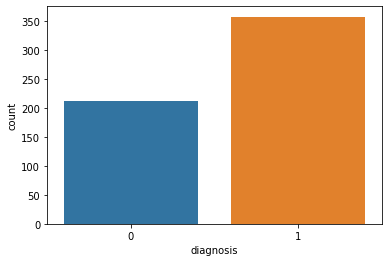

In [42]:
sns.countplot(x='diagnosis',data=dataset)
plt.show()


## Feature Scalling

In [51]:
feature_scale =[feature for feature in dataset.columns if feature not in ['diagnosis']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataset[feature_scale] = scaler.fit_transform(dataset[feature_scale])


In [52]:
dataset.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0


## Seprate the dependent and  Independent Features

In [53]:
y = dataset['diagnosis']
X = dataset.drop('diagnosis',axis=1)

##  train-test-split

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test =  train_test_split(X,y,test_size=0.3,random_state=0)


## Model Development

### logistic regression

In [58]:
from sklearn.linear_model import LogisticRegression
lg =LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

### Accuracy

In [63]:
lg.score(X_test,y_test)

0.9239766081871345

### Random forest

In [66]:
from sklearn.ensemble import RandomForestClassifier
clasifier = RandomForestClassifier()
clasifier.fit(X_train,y_train)

RandomForestClassifier()

### Accuracy

In [67]:
clasifier.score(X_test,y_test)

0.9473684210526315